In [197]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import koreanize_matplotlib
from gensim.models import Word2Vec
import platform
import seaborn as sns
import re
from konlpy.tag import Okt

In [198]:
company_scout_pd = pd.read_csv('company_scout_info.csv', encoding='utf-8', header=0)
company_scout_pd.head()

,회사명,경력,학력,스킬,핵심역량,기본우대,자격증,외국어]
0,㈜아이엠뱅크,경력 직무에 따라 상이,학력무관,NaN,"성실성, 성취지향성, 계획성",NaN,NaN,NaN
1,GS리테일,경력 (3년이상),대졸이상,SQL,"계획성, 꼼꼼함, 성실성",NaN,NaN,NaN
2,(주)우아한형제들,신입·경력,학력무관,"ASP, API, ASP.NET, CSS, HTML, JAVA, Javascript...",NaN,NaN,NaN,NaN
3,㈜이스트소프트,신입·경력,학력무관,"AWS, CSS, HTML, Jira, Spring, SQL, Figma, Noti...","계획성, 꼼꼼함, 성실성",NaN,NaN,NaN
4,휴먼교육센터,신입·경력,학력무관,".Net, DB2, Django, JAVA, JSP, MSSQL, MySQL, Or...",NaN,NaN,NaN,NaN


In [199]:
if platform.system() == 'Windows':
    path = r'c:\Window\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    path = r'c:\System\Library\Fonts\AppleGothic'
else:
    font = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

In [200]:
def create_wordcloud(pd,col,find_str = ', '):
    company_skill = pd[col].dropna().to_list()
    print(len(company_skill))
    want_skill = ''
    for skill in company_skill:
        for s in skill.split(find_str):
            want_skill = want_skill + ' ' + s

    wordcloud = WordCloud(width=2000, height=1400, background_color='white', font_path=path).generate(want_skill)
    plt.figure(figsize=(16, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

283


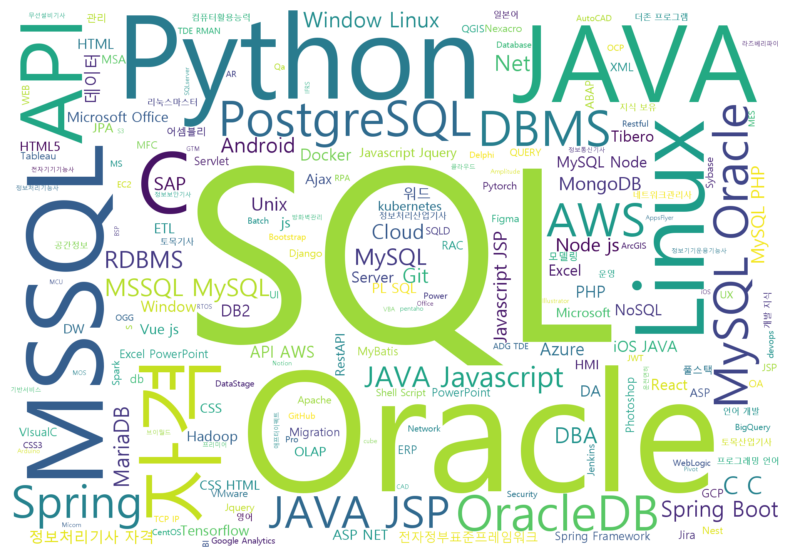

In [201]:
create_wordcloud(company_scout_pd,'스킬')

101


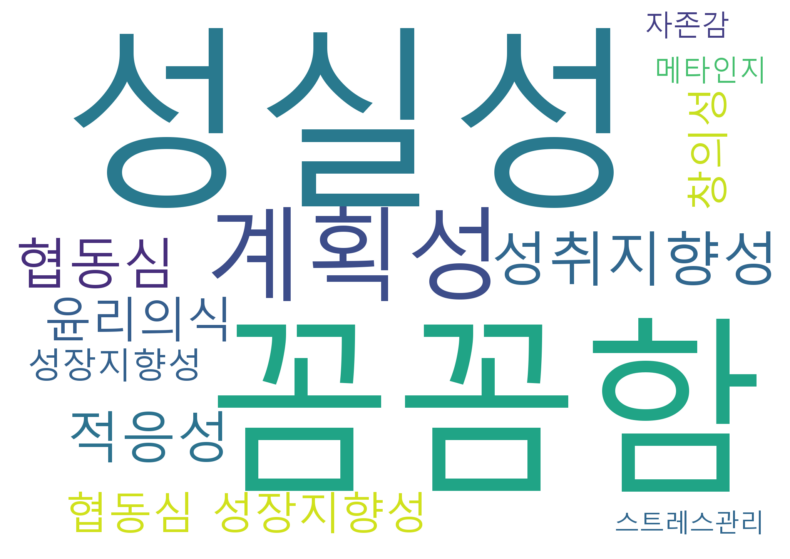

In [202]:
create_wordcloud(company_scout_pd,'핵심역량')

In [203]:
def count_list_data(pd,col,find_str=', '):
    company_minds = pd[col].dropna().to_list()
    mind_list = []
    for minds in company_minds:
        for m in minds.split(find_str):
            mind_list.append(m)
    mind_list_tp = tuple(mind_list)
    data_dict = {}

    for tp in mind_list_tp:
        data_dict[tp] = mind_list.count(tp)
    return data_dict
compnay_mind_dict = count_list_data(company_scout_pd,'핵심역량')

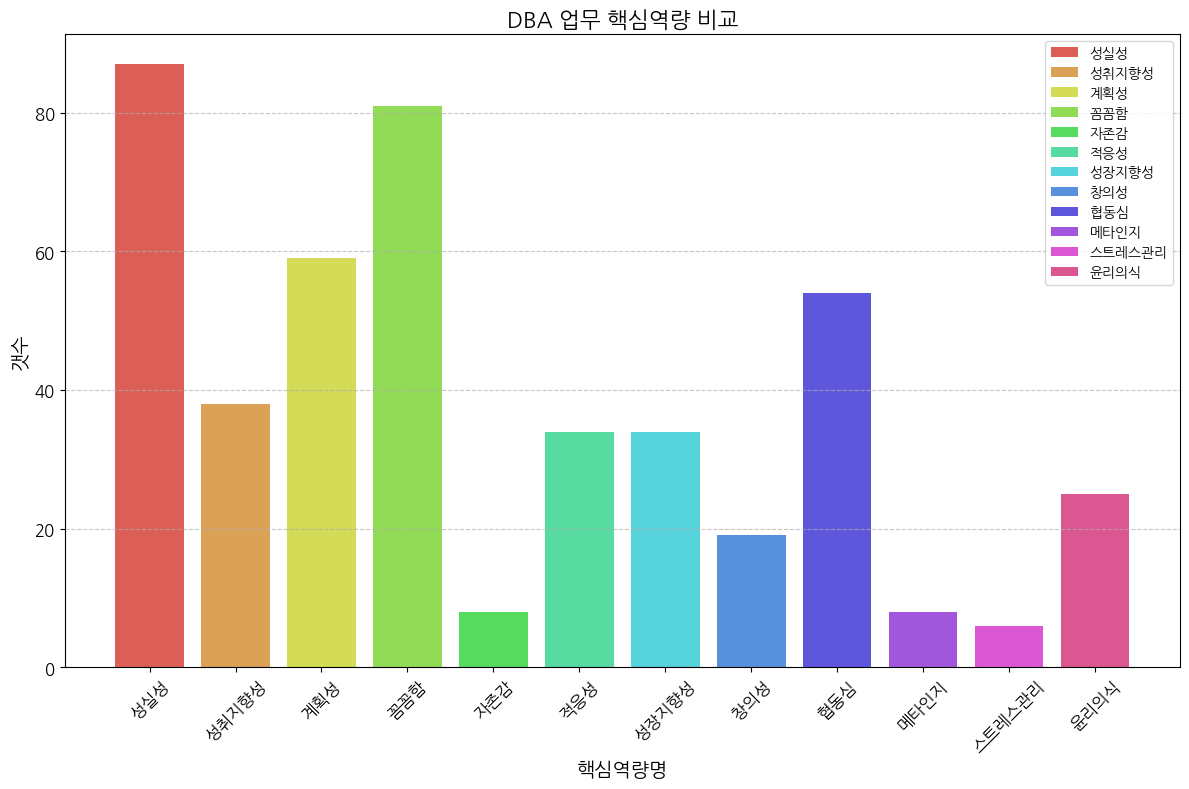

In [204]:
def plot_bar_chart(data_dict, title, xlabel, ylabel):
    # 데이터 추출
    categories = list(data_dict.keys())
    values = list(data_dict.values())
    color = sns.color_palette('hls',len(values))
    
    # 그래프 크기 및 스타일 설정
    plt.figure(figsize=(12, 8))
    plt.bar(categories, values, color=color,label=categories)
    
    # 제목 및 축 레이블 설정
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # 축 눈금 폰트 크기 설정
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend()
    # 격자 추가 (y축)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()

plot_bar_chart(compnay_mind_dict,'DBA 업무 핵심역량 비교','핵심역량명','갯수')

In [205]:
def count_list_data_tp(pd,col):
    company_minds = pd[col].dropna().to_list()
    mind_list = []
    for minds in company_minds:
        mind_list.append(minds)
    mind_list_tp = tuple(mind_list)
    data_dict = {}

    for tp in mind_list_tp:
        data_dict[tp] = mind_list.count(tp)
    return data_dict
compnay_time_dict = count_list_data_tp(company_scout_pd,'경력')

In [206]:
career_categories = {
    "신입": 0,
    "경력총원":0,
    "무관": 0
}
career_year = {}
# 경력 구분 정규식
pattern = re.compile(r'(\d+)년이상')

# 분류하기
for key, value in compnay_time_dict.items():
    if "신입" in key:
        career_categories["신입"] += value
    if "경력" in key:
        match = pattern.search(key)
        if match:
            career_categories["경력총원"] += value
            years = match.group(1)+'년 이상'
            if not career_year.get(years) : career_year[years] = 0
            career_year[years] += value
        else:
            career_categories["무관"] += value

# 결과 출력
print(f"신입: {career_categories['신입']}")
print(f"무관: {career_categories['무관']}")
print(f"경력총원: {career_categories['경력총원']}")
print("경력:")
career_year = dict(sorted(career_year.items(), key=lambda item: item[0][:3])[:7])
for years, count in career_year.items():
    print(f"{years}: {count}명")

신입: 93
무관: 156
경력총원: 249
경력:
10년 이상: 16명
1년 이상: 33명
2년 이상: 35명
3년 이상: 68명
4년 이상: 11명
5년 이상: 52명
6년 이상: 9명


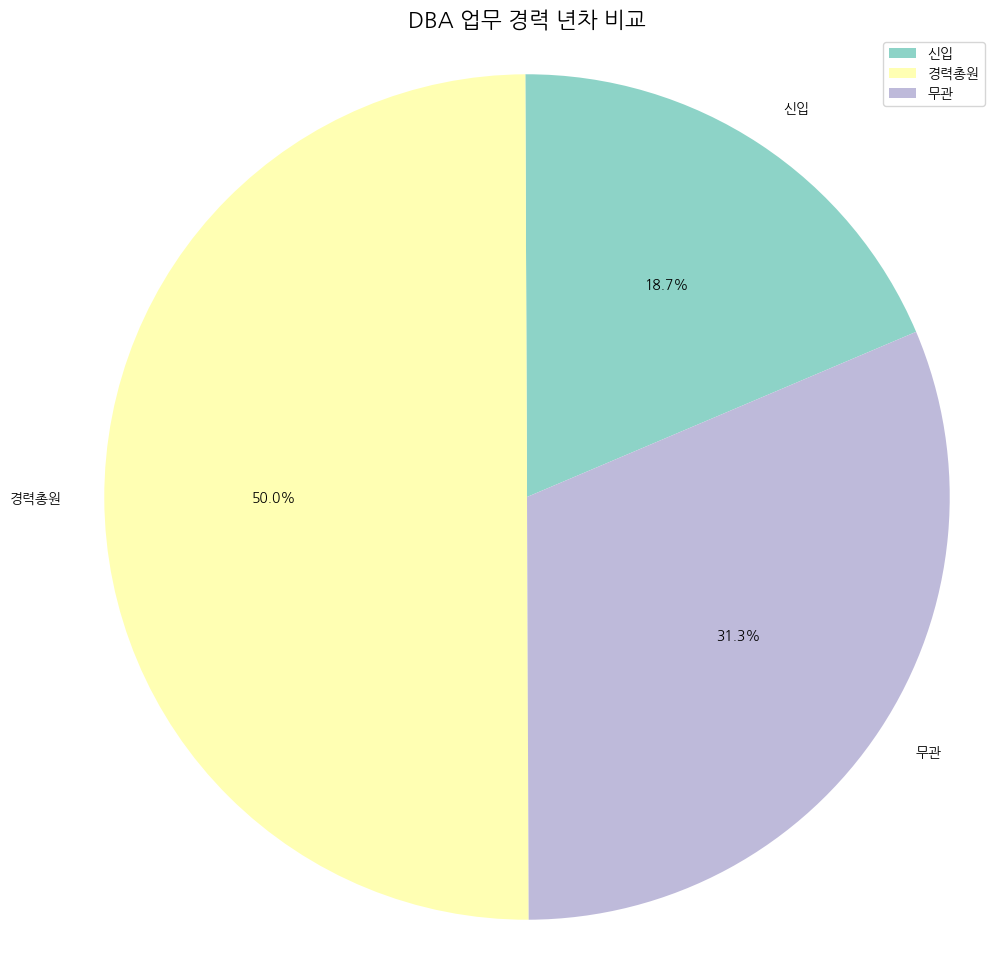

In [207]:
def plot_pie_chart(data_dict, title):
    # 데이터 추출
    labels = list(data_dict.keys())
    sizes = list(data_dict.values())
    
    # 색상 팔레트 선택 (원하는 색상 팔레트를 사용할 수 있습니다)
    colors = plt.get_cmap('Set3').colors
    
    # 파이 그래프 그리기
    plt.figure(figsize=(12, 12))
    plt.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', startangle=23)
    
    # 그래프 제목
    plt.title(title, fontsize=16)
    plt.legend()
    # 원형 비율을 맞추기 위해 axis 'equal' 설정
    plt.axis('equal')
    
    # 그래프 보여주기
    plt.show()
plot_pie_chart(career_categories,'DBA 업무 경력 년차 비교')

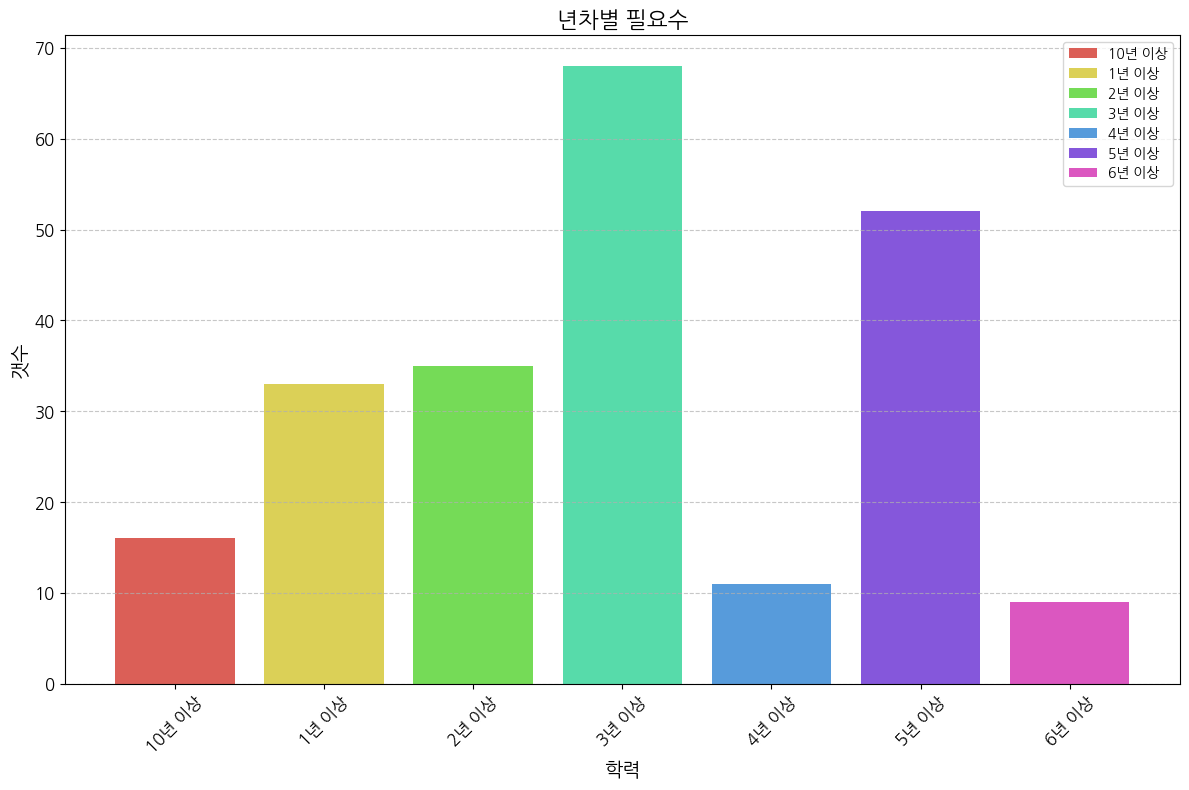

In [208]:
plot_bar_chart(career_year,'년차별 필요수','학력','갯수')

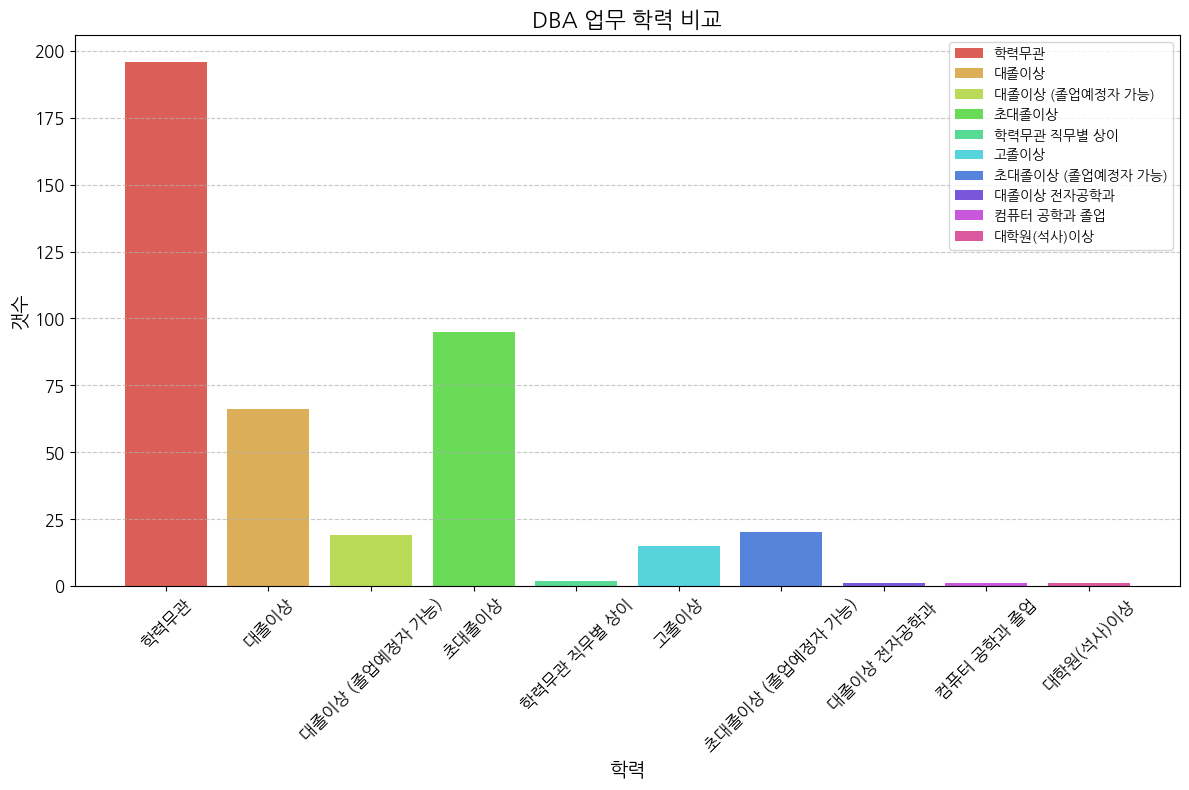

In [209]:
compnay_school_dict = count_list_data(company_scout_pd,'학력')
plot_bar_chart(compnay_school_dict,'DBA 업무 학력 비교','학력','갯수')

In [210]:
company_work_pd = pd.read_csv('company_work_info.csv', encoding='utf-8', header=0)
company_work_pd.head()

,회사명,산업,사원수,설립,기업형태,매출액,연금·보험,휴무·휴가·행사,사내시설
0,㈜아이엠뱅크,국내은행,"3,037명",1967년 (58년차),대기업 (코스피),NaN,NaN,NaN,NaN
1,GS리테일,백화점·유통·도소매,"8,000명",1971년 (54년차),대기업 (코스피),NaN,"국민연금 , 고용보험, 산재보험, 건강보험",NaN,NaN
2,(주)우아한형제들,응용 소프트웨어 개발 및 공급업,"2,010명",2011년 (14년차),중견기업 (비상장),"3조 4,134억 7,925만원",NaN,NaN,NaN
3,㈜이스트소프트,응용 소프트웨어 개발 및 공급업,170명,1993년 (32년차),중소기업 (코스닥 상장),NaN,NaN,NaN,NaN
4,휴먼교육센터,기타 기술 및 직업훈련학원,10명,2023년 (2년차),중소기업 (비상장),NaN,NaN,NaN,NaN


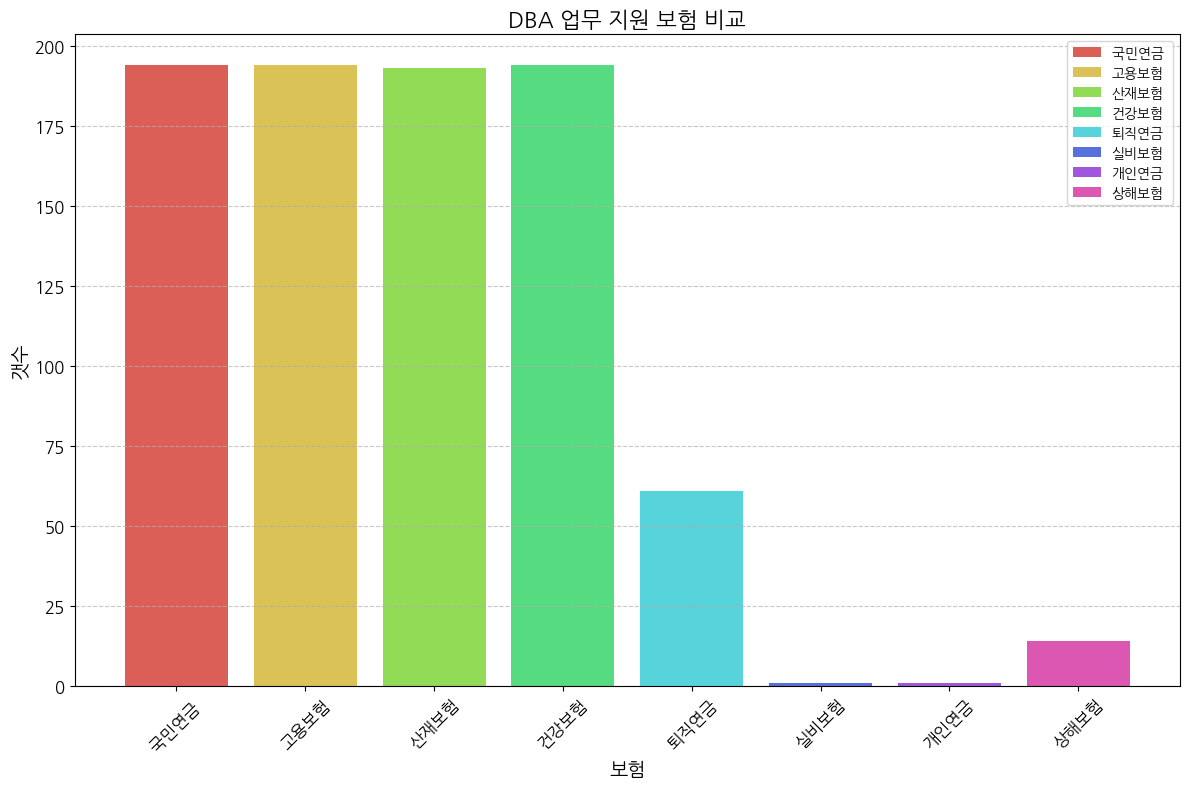

In [211]:
compnay_money_dict = count_list_data(company_work_pd,'연금·보험',', ')
plot_bar_chart(compnay_money_dict,'DBA 업무 지원 보험 비교','보험','갯수')

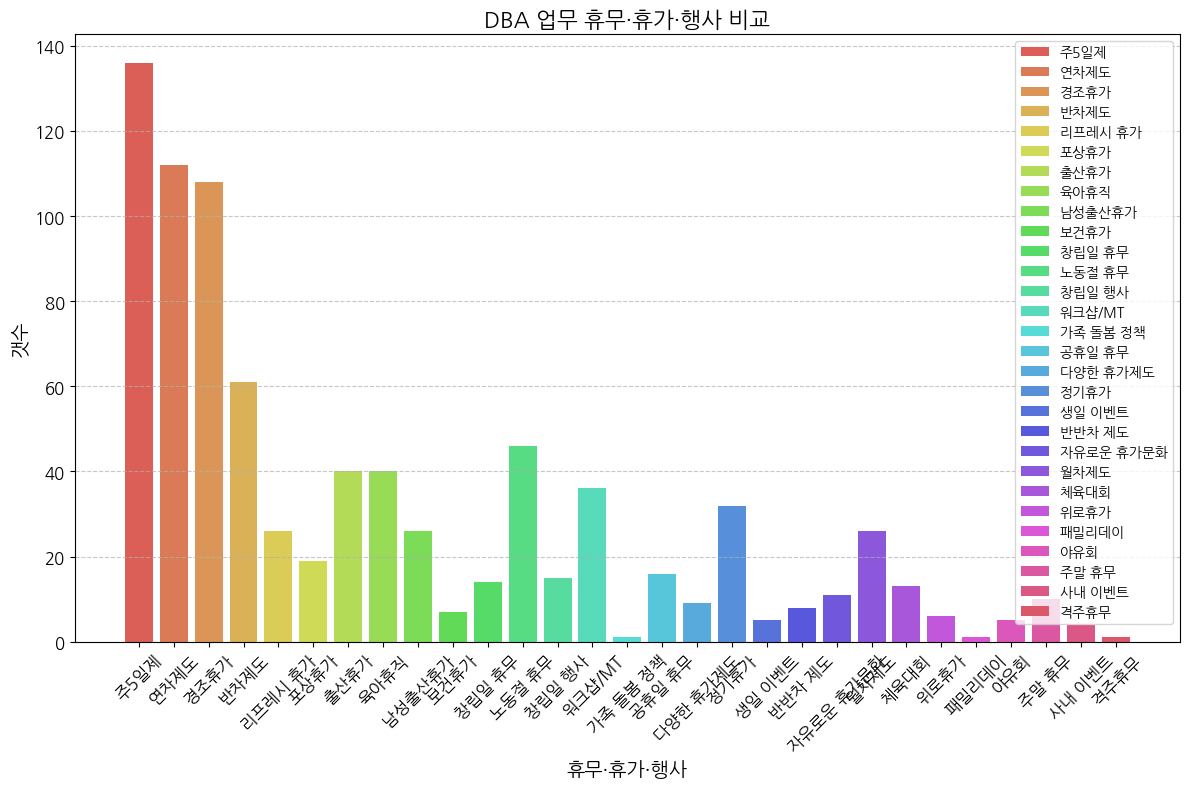

In [212]:
compnay_help_dict = count_list_data(company_work_pd,'휴무·휴가·행사',', ')

plot_bar_chart(compnay_help_dict,'DBA 업무 휴무·휴가·행사 비교','휴무·휴가·행사','갯수')

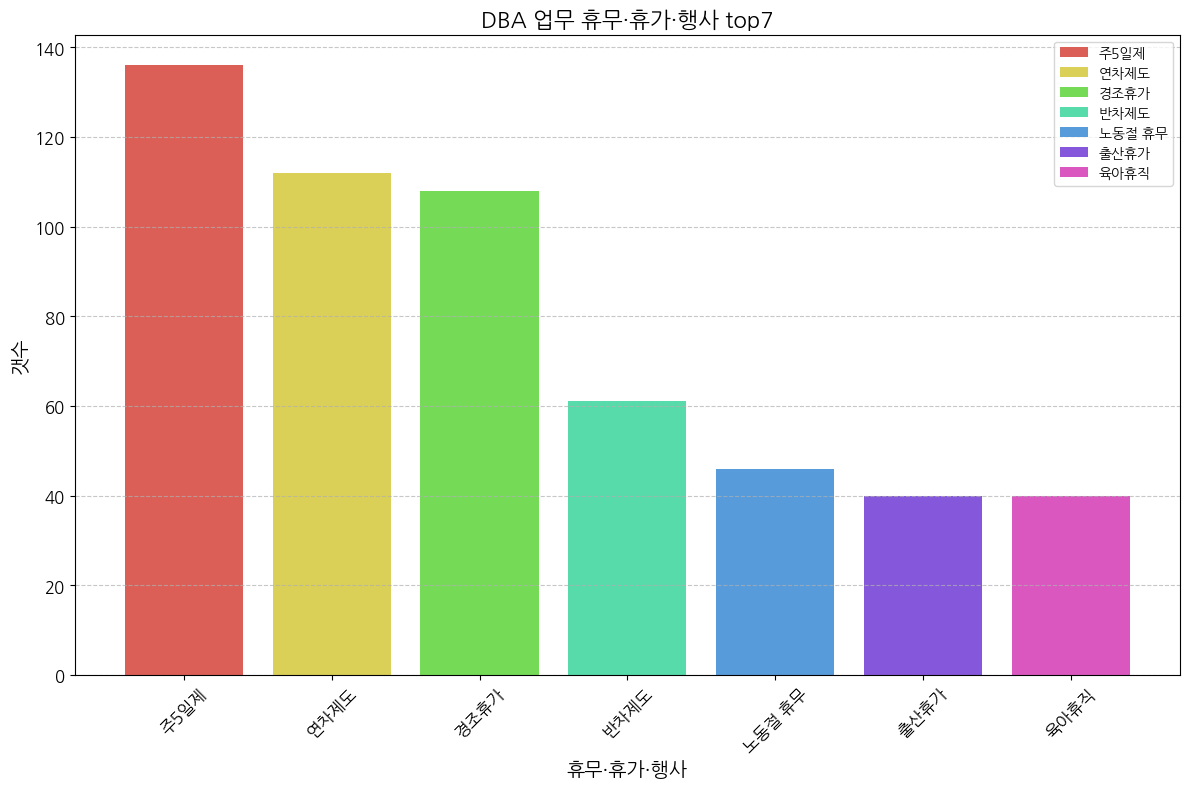

In [213]:
compnay_help_dict_top7 = dict(sorted(compnay_help_dict.items(), key=lambda item: item[1], reverse=True)[:7])
plot_bar_chart(compnay_help_dict_top7,'DBA 업무 휴무·휴가·행사 top7','휴무·휴가·행사','갯수')

In [214]:
company_co_pd = pd.read_csv('company_corear.csv', encoding='utf-8', header=0)
company_co_pd.head()

,회사명,질문,답
0,금융결제원,금융결제원 지원 동기(금융결제원이 본인을 채용해야 하는 이유) ※ 작성 내용에 본인...,"""최고가 되기 위해서"" 금융결제원은 국내 다양한 금융 관련 서비스를 지원하는 최고의..."
1,금융결제원,금융결제원이 제공하는 서비스를 이용해 본 경험과 느낀 점을 기술하시오.보기,"금융결제원이 제공하는 서비스는 매우 다양하며, 저는 개인적으로 금융공동망과 인터넷지..."
2,금융결제원,채용공고 상의 수행 직무 및 본인이 희망하는 관심 직무와 관련하여 전문가가 되기 위...,"""노력의 발자취"" 개인 프로젝트 중 기억에 남는 것은 member의 id를 통해 이..."
3,금융결제원,"조직(예 : 학교, 동아리, 가족 등)의 구성원으로서 갈등이 있었던 상황을 설명하고...","""융합이란, IoT란"" 4차 산업혁명이 도래하며 세계는 빠르게 발전하고 있습니다. ..."
4,금융결제원,"자신의 가치관 또는 인생관에 영향을 미친 경험을 소개하고, 이를 통해 배우거나 느낀...","""앞서, 소통하며"" 저는 지금까지 친구들과 버스킹을 하거나, 농구 대회를 나가고, ..."


In [215]:
company_co_list = company_co_pd['질문'].to_list()
okt = Okt()
tokenized_sentences = [okt.morphs(sentence) for sentence in company_co_list]

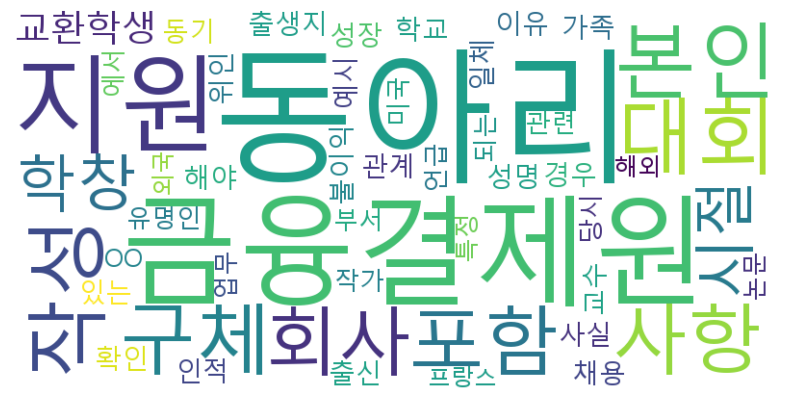

In [216]:
def create_list_wordcloud_(lists,stop_words):
    str_text = ''
    for s in lists:
        if len(s) > 1:
            if s not in stop_words:
                str_text = str_text + ' ' + s

    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=path).generate(str_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
create_list_wordcloud_(tokenized_sentences[0],['내용','이나','하는','허위','인명','보기','링크','제목','금지','있습니다'])

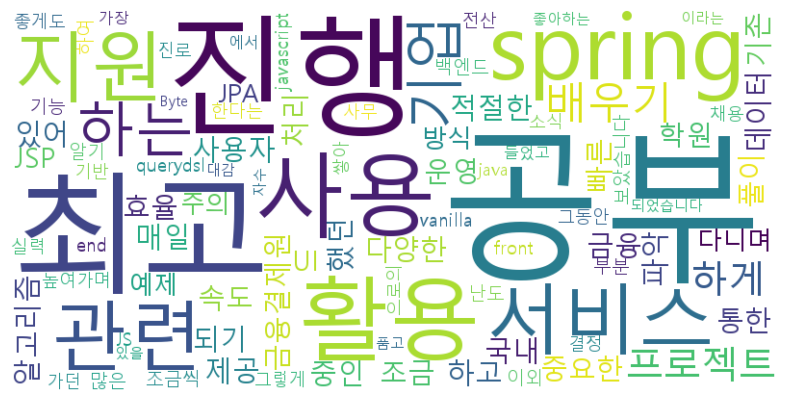

In [217]:
company_co_list = company_co_pd['답'].to_list()
okt = Okt()
tokenized_sentences = [okt.morphs(sentence) for sentence in company_co_list]
create_list_wordcloud_(tokenized_sentences[0],['위해','입니다','에의','여러','그리고','이런','했습니다','에게','이를','되는','하기','하였고','대해','에도','있습니다'])